In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
from category_encoders import OrdinalEncoder



In [2]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis'>

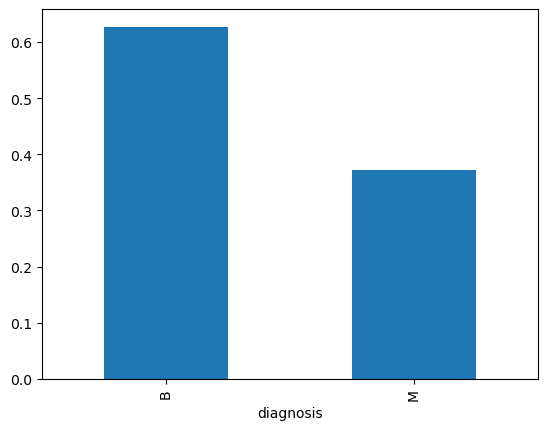

In [6]:
df['diagnosis'].value_counts(normalize=True).plot(kind='bar')

<Axes: >

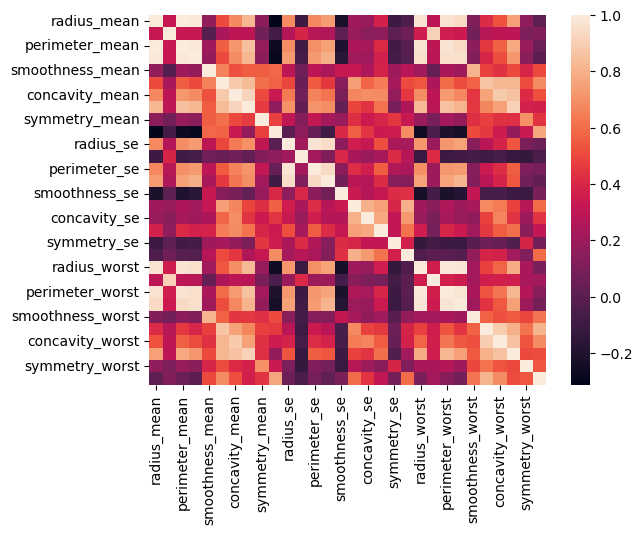

In [7]:
correlation = df.select_dtypes('number').corr()
sns.heatmap(correlation)

In [8]:
cols = [col for col in df.columns if 'worst' in col]
df.drop(columns=cols, inplace=True)

In [9]:
#  drop columns related to the perimeter and area
df.drop(columns=['perimeter_mean', 'perimeter_se', 'area_mean', 'area_se'],inplace=True)

In [10]:
df.drop(columns=['concavity_mean','concavity_se', 'concave points_mean', 'concave points_se'], inplace=True)

In [11]:
df.drop(columns=['fractal_dimension_se','compactness_se', 'radius_se'], inplace=True)

<Axes: >

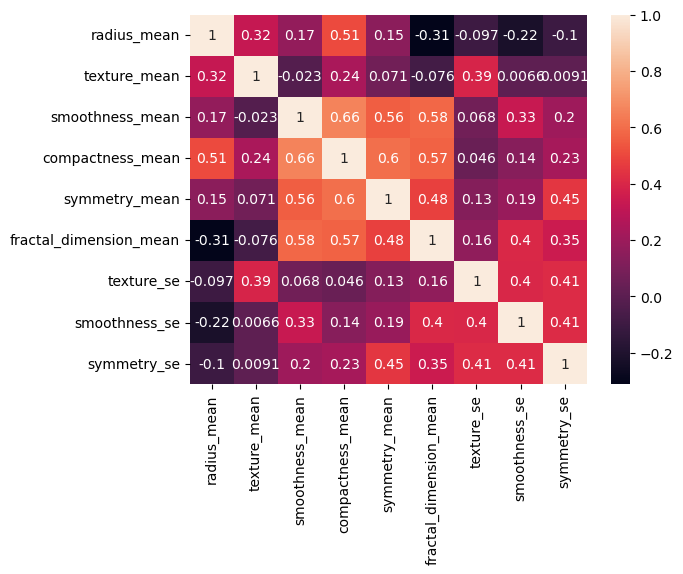

In [12]:
correlation = df.select_dtypes('number').corr()
sns.heatmap(correlation, annot=True)

In [13]:
# Convert categorical columns 
df['diagnosis'] = df['diagnosis'].replace({'B':0,'M':1})
df.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756


## Split

In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'symmetry_se'],
      dtype='object')

In [15]:
target='diagnosis'
X= df.drop(columns=target)
y=df[target]


In [16]:
# Randomised train, validation, test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

## Build Model

In [17]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
training_acc=accuracy_score(y_train, model.predict(X_train))
validation_acc = model.score(X_val, y_val)

print(f'Training Accuracy: {training_acc}')
print(f'Validation Accuracy: {validation_acc}')

Training Accuracy: 1.0
Validation Accuracy: 0.8241758241758241


## Hyper parameter tuning 

In [19]:
tree_depth = model.get_depth()
tree_depth

9

In [20]:
depth_hyperparam=(1,10,2)
training_acc=[]
validation_acc=[]
for d in depth_hyperparam:
    # create model
    test_model=DecisionTreeClassifier(max_depth=d, random_state=42)
    # fit the training data
    test_model.fit(X_train, y_train)
    # Append training accuracy and validation accuracy to the list 
    training_acc.append(test_model.score(X_train,y_train))  
    validation_acc.append(test_model.score(X_val,y_val)) 

print(training_acc[:5])
print(validation_acc[:5]) 


[0.8791208791208791, 1.0, 0.9203296703296703]
[0.8791208791208791, 0.8241758241758241, 0.8461538461538461]


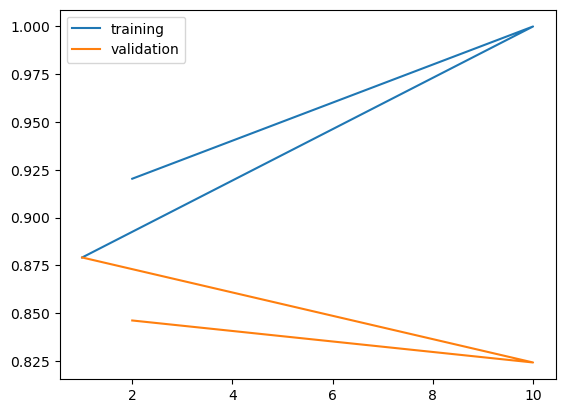

In [21]:
plt.plot(depth_hyperparam, training_acc, label='training')
plt.plot(depth_hyperparam, validation_acc, label='validation')
plt.legend()

# We see our highest accuracy_score for the validation data is around the 1 depth of hyperparams 


In [22]:
# Lets set our maximum depth to 1
model=DecisionTreeClassifier(max_depth=1, random_state=42)
model.fit(X_train, y_train)

training_acc=accuracy_score(y_train, model.predict(X_train))
validation_acc = model.score(X_val, y_val)

print(f'Training Accuracy: {training_acc}')
print(f'Validation Accuracy: {validation_acc}')

Training Accuracy: 0.8791208791208791
Validation Accuracy: 0.8791208791208791


In [23]:
# Now lets see with our testing data
model.score(X_test, y_test)

0.9298245614035088

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
acc_score= accuracy_score(y_train, model.predict(X_train))
test_score= model.score(X_test, y_test)

print(f'Traing accuracy: {acc_score}')
print(f'Testing accuracy: {test_score}')

Traing accuracy: 0.8846153846153846
Testing accuracy: 0.9035087719298246
